In [25]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import ipywidgets as widgets
from dataclasses import dataclass
import typing as T
import datetime as dt

In [2]:
from_date = widgets.DatePicker()
to_date = widgets.DatePicker()
print('From date:')
display(from_date)
print('To date:')
display(to_date)

From date:


DatePicker(value=None)

To date:


DatePicker(value=None)

In [30]:
url = f"https://api.energidataservice.dk/dataset/Elspotprices/download?format=XL&offset=0&start={from_date.value}T00:00&end={to_date.value}T00:00&filter=%7B%22PriceArea%22:%22DK2%22%7D&sort=HourDK%20DESC&timezone=dk"
df = pd.read_excel(url)
df['dt'] = df.HourDK.dt.date
df['h'] = df.HourDK.dt.hour
df.head()

,HourUTC,HourDK,PriceArea,SpotPriceDKK,SpotPriceEUR,dt,h
0,2022-09-19 21:00:00,2022-09-19 23:00:00,DK2,2206.360107,296.690002,2022-09-19,23
1,2022-09-19 20:00:00,2022-09-19 22:00:00,DK2,2548.370117,342.679993,2022-09-19,22
2,2022-09-19 19:00:00,2022-09-19 21:00:00,DK2,2788.719971,375.000000,2022-09-19,21
3,2022-09-19 18:00:00,2022-09-19 20:00:00,DK2,3123.739990,420.049988,2022-09-19,20
4,2022-09-19 17:00:00,2022-09-19 19:00:00,DK2,3287.350098,442.049988,2022-09-19,19


In [19]:
df.HourDK.max()

Timestamp('2022-09-19 23:00:00')

In [20]:
def spot_heatmap(df, annot=True):
    dates = sorted(df.dt.unique())
    df_plot = pd.DataFrame(index=sorted(df.h.unique()))
    for date in dates:
        dt_col = date.isoformat().replace('-', '_')
        df_sub = df[df.dt == date].set_index('h').SpotPriceDKK.to_frame(dt_col)
        df_sub[dt_col] = df_sub[dt_col] / 1000.0
        df_plot = df_plot.join(df_sub)
    sns.heatmap(df_plot, annot=annot, cmap='RdYlGn_r', fmt='.3g')
    plt.show()

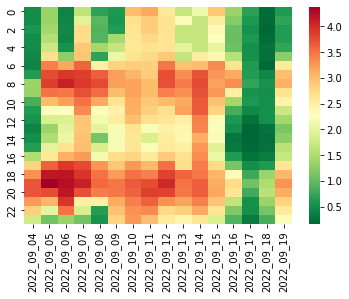

In [31]:
spot_heatmap(df, annot=False)

In [32]:
df.to_csv('../snap2.csv', index=False)

In [28]:
@dataclass
class State:
    now: dt.datetime
    rate: float
    rate_window: pd.DataFrame


@dataclass
class Battery:
    pass


class Simulator:
    def __init__(df):
        self.df = df
        self.horisont_hours = 14*24 
        
    def simulate_policy(policy):
        pass